In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
reg = pd.read_csv('/Users/stiso/Documents/Code/graph_learning/ECoG_data/ephys_analysis/searchlight_regions.csv')

In [52]:
reg.head()

,subj,space,region
0,1,latent,Left Cerebral White Matter
1,1,latent,Left ITG inferior temporal gyrus
2,1,latent,Left Cerebral White Matter
3,1,latent,Left Cerebral White Matter
4,1,latent,Left MFG middle frontal gyrus


In [53]:
def clean_string(s):
    s = s.split(' ')
    new_s = s[1] + s[0][0]
    return new_s

reg['reg_short'] = reg['region'].apply(lambda x: clean_string(x))
reg.sort_values(by='reg_short', inplace=True)
reg.head()

,subj,space,region,reg_short
102,10,euclid,Left ACgG anterior cingulate gyrus,ACgGL
17,2,latent,Right AIns anterior insula,AInsR
16,2,latent,Right AIns anterior insula,AInsR
80,4,euclid,Right AIns anterior insula,AInsR
98,10,euclid,Left Amygdala,AmygdalaL


In [54]:
reg['hem'] = reg['reg_short'].apply(lambda x: x[-1])
reg.head()

,subj,space,region,reg_short,hem
102,10,euclid,Left ACgG anterior cingulate gyrus,ACgGL,L
17,2,latent,Right AIns anterior insula,AInsR,R
16,2,latent,Right AIns anterior insula,AInsR,R
80,4,euclid,Right AIns anterior insula,AInsR,R
98,10,euclid,Left Amygdala,AmygdalaL,L


In [55]:
reg['reg_short_nh'] = reg['reg_short'].apply(lambda x: x[0:-1])
reg.head()

,subj,space,region,reg_short,hem,reg_short_nh
102,10,euclid,Left ACgG anterior cingulate gyrus,ACgGL,L,ACgG
17,2,latent,Right AIns anterior insula,AInsR,R,AIns
16,2,latent,Right AIns anterior insula,AInsR,R,AIns
80,4,euclid,Right AIns anterior insula,AInsR,R,AIns
98,10,euclid,Left Amygdala,AmygdalaL,L,Amygdala


(array([0, 1]), <a list of 2 Text xticklabel objects>)

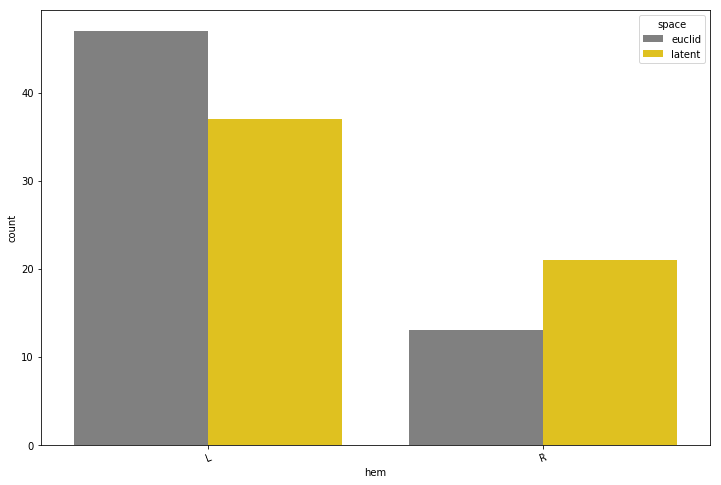

In [56]:
fig = plt.figure(figsize=(12,8))
sns.countplot(data=reg, x='hem', hue='space', palette = ['grey','gold'])
plt.xticks(rotation=20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

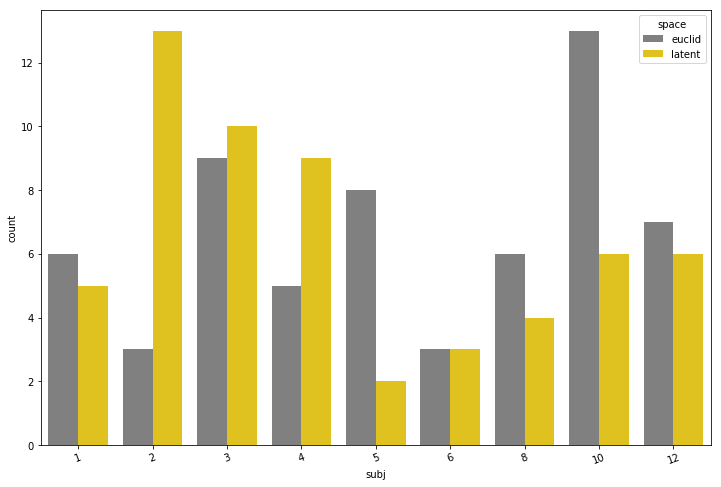

In [57]:
fig = plt.figure(figsize=(12,8))
sns.countplot(data=reg, x='subj', hue='space', palette = ['grey','gold'])
plt.xticks(rotation=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

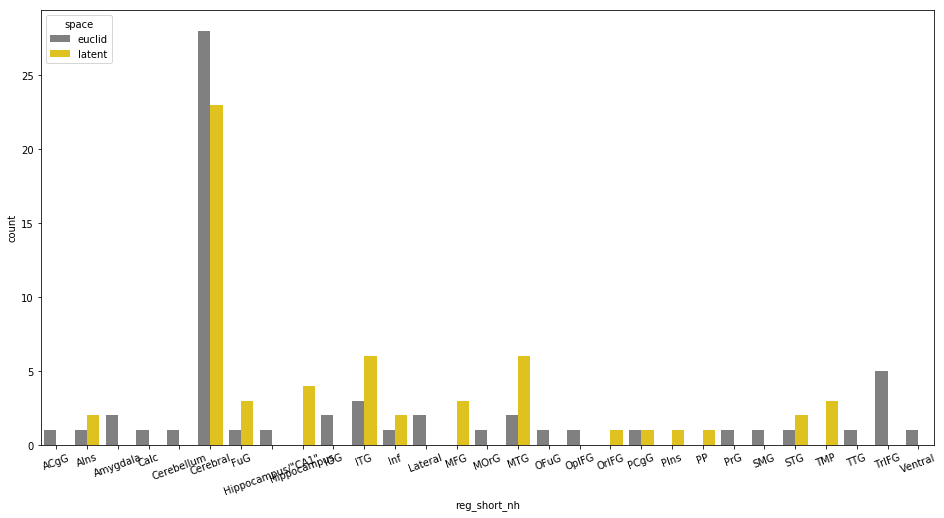

In [58]:
fig = plt.figure(figsize=(16,8))
sns.countplot(data=reg, x='reg_short_nh', hue='space', palette = ['grey','gold'])
plt.xticks(rotation=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

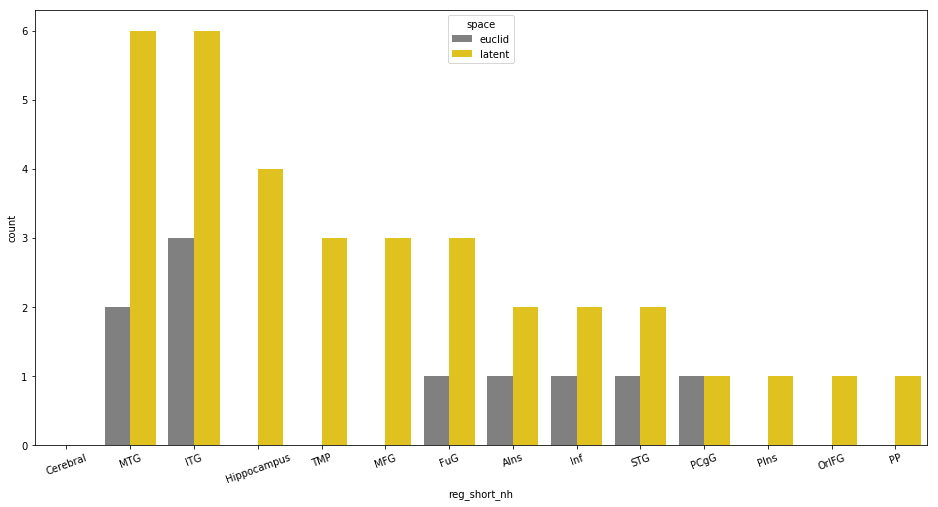

In [59]:
fig = plt.figure(figsize=(16,8))
sns.countplot(data=reg[reg['reg_short_nh'] != 'Cerebral'], x='reg_short_nh', hue='space', palette = ['grey','gold'],
             order = reg.loc[reg['space'] == 'latent','reg_short_nh'].value_counts().index)
plt.xticks(rotation=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

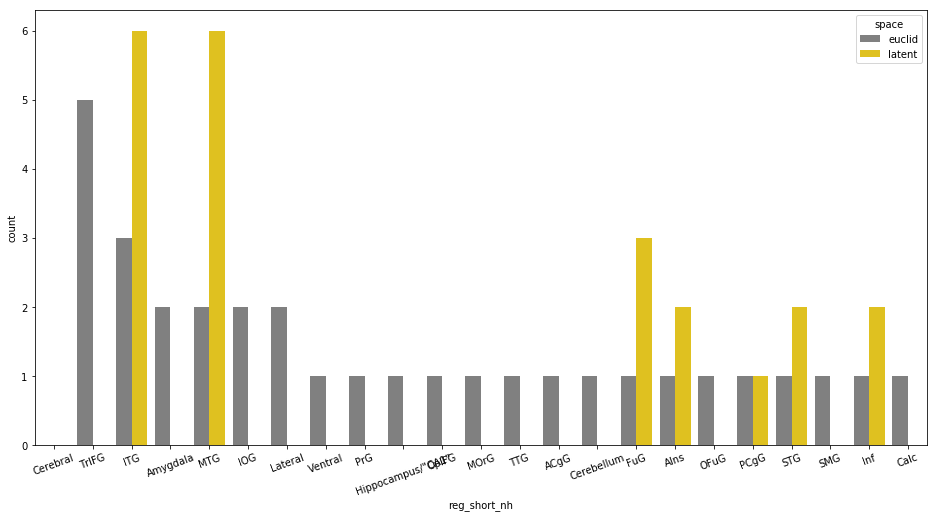

In [60]:
fig = plt.figure(figsize=(16,8))
sns.countplot(data=reg[reg['reg_short_nh'] != 'Cerebral'], x='reg_short_nh', hue='space', palette = ['grey','gold'],
             order = reg.loc[reg['space'] == 'euclid','reg_short_nh'].value_counts().index)
plt.xticks(rotation=20)

In [61]:
reg[reg['reg_short_nh'] == 'IOG']

,subj,space,region,reg_short,hem,reg_short_nh
88,5,euclid,Left IOG inferior occipital gyrus,IOGL,L,IOG
87,5,euclid,Left IOG inferior occipital gyrus,IOGL,L,IOG
